In [42]:
from mnist import MNIST
import random 
import math

mndata = MNIST('samples')

images, labels = mndata.load_training()
# 1or
# images, labels = mndata.load_testing()

In [43]:
# index = 999  # choose an index ;-)
# # print(mndata.display(images[index]))
# print(labels[index])
# print(len(images[index]))
print(labels[0])

5


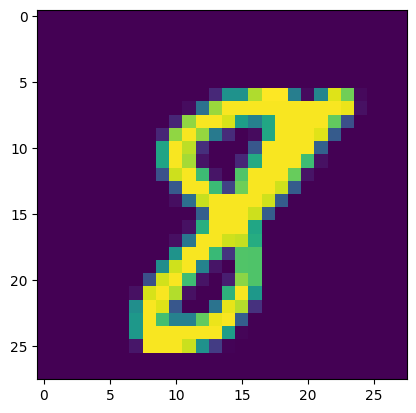

In [44]:
import matplotlib.pyplot as plt
import numpy as np
index = 55
image = np.array(images[index]).reshape(28, 28)
plt.imshow(image)
plt.show()

In [45]:
class neuron:
    def __init__(self, activation, layer, row, weights, bias):
        self.activation = activation
        self.layer = layer
        self.row = row
        self.weights = weights
        self.bias = bias 


In [46]:
class input_neuron(neuron):
    def __init__(self, activation, row):
        super().__init__(activation, 0, row, [], 0)

In [47]:
class output_neuron(neuron):
    def __init__(self, activation, row, weights, bias):
        super().__init__(0, 3, row, weights, bias)

In [48]:
class hidden_neuron(neuron):
    def __init__(self, activation, layer, row, weights, bias):
        super().__init__(activation, layer, row, weights, bias)

In [49]:
net = [[],[],[],[]]
for i in range(len(images[0])):
    net[0].append(input_neuron(0, i))
for i in range(1, 3):
    for j in range(16):
        net[i].append(hidden_neuron(0, i, j, [random.randint(0, 100)/100 for i in range(len(net[i-1]))], random.randint(-100, 100)))
for i in range(10):
    net[3].append(output_neuron(0, i, [random.randint(0, 100)/100 for i in range(len(net[2]))], random.randint(-100, 100)))


In [50]:
image_number = 0
for i in range(len(net[0])):
    net[0][i].activation = images[image_number][i]
    

In [51]:
def run_net(input, net):
    #loads image
    for i in range(len(net[0])):
        net[0][i].activation=input[i]
    # activates first hidden layer
    activate_layer(net, 1)
    activate_layer(net, 2)
    activate_layer(net, 3)
    
    return net[-1 ]

def activate_layer(net, layer):
    for i in range(len(net[layer])):
        for j in range(len(net[layer-1])):
            net[layer][i].activation += (net[layer-1][j].activation * net[layer][i].weights[j])
        net[layer][i].activation += net[layer][i].bias
        net[layer][i].activation = 1/(1+math.exp(net[layer][i].activation * -1))
    


    



In [55]:
def cost(image_number, net, images, labels):
    cost = 0
    output = run_net(images[image_number], net)
    excepted_output = [0 for i in range(10)]
    excepted_output[labels[image_number]] = 1.0

    output = run_net(images[1], net)
    print(output)
    print(excepted_output)

    for i in range(len(output)):
        cost+=((output[i].activation-excepted_output[i])**2)

    return cost

print(cost(5, net, images, labels))
    




[<__main__.output_neuron object at 0x000001C5B780A250>, <__main__.output_neuron object at 0x000001C590ECB990>, <__main__.output_neuron object at 0x000001C5943BC210>, <__main__.output_neuron object at 0x000001C5BA94D250>, <__main__.output_neuron object at 0x000001C590FD55D0>, <__main__.output_neuron object at 0x000001C5B780A2D0>, <__main__.output_neuron object at 0x000001C5B780A550>, <__main__.output_neuron object at 0x000001C5B780A590>, <__main__.output_neuron object at 0x000001C5B780A510>, <__main__.output_neuron object at 0x000001C5B780A690>]
[0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0]
5.9997484226199065
